In [6]:
import pandas as pd
import numpy as np

In [7]:
loc_lbl = r"D:\FacundoTorraca\Documents\TP2_Machine_Learning\Labels"

In [8]:
loc_ftr = r"D:\FacundoTorraca\Documents\TP2_Machine_Learning\Features\ftr_auc"

In [9]:
auc_lb = pd.read_csv( loc_lbl + "\\auc_lb.csv", dtype = {"obs_18_20":"bool", "obs_21_23":"bool", "obs_24_26":"bool"} )

### Filtro de manera que tenga los datos necesarios

In [10]:
rh_18_20 = pd.read_csv( r"D:\FacundoTorraca\Documents\TP2_Machine_Learning\Training Sets\auc_18_20.csv" ).rename( columns = {"device_id":"ref_hash"} ); rh_18_20 = rh_18_20["ref_hash"].drop_duplicates().tolist()
rh_21_23 = pd.read_csv( r"D:\FacundoTorraca\Documents\TP2_Machine_Learning\Training Sets\auc_21_23.csv" ).rename( columns = {"device_id":"ref_hash"} ); rh_21_23 = rh_21_23["ref_hash"].drop_duplicates().tolist()

In [11]:
set_trn = auc_lb.loc[ auc_lb["ref_hash"].isin( rh_18_20 ), ["ref_hash", "21_23_st"] ]
set_tst = auc_lb.loc[ auc_lb["ref_hash"].isin( rh_21_23 ), ["ref_hash", "24_26_st"] ]

t_lim = 259200; max_t = 400
set_trn_loc = pd.concat( [ set_trn.loc[ set_trn["21_23_st"] < t_lim ], set_trn.loc[ set_trn["21_23_st"] == t_lim ].reset_index( drop = True ).loc[: max_t] ], axis = 0 ).sample(frac=1).reset_index(drop=True)
set_tst_loc = pd.concat( [ set_tst.loc[ set_tst["24_26_st"] < t_lim ], set_tst.loc[ set_tst["24_26_st"] == t_lim ].reset_index( drop = True ).loc[: max_t] ], axis = 0 ).sample(frac=1).reset_index(drop=True)

### Creamos los Train/Test

In [55]:
Z = set_tst[ ["ref_hash"] ] #Datos test
W = set_tst[ ["ref_hash","24_26_st"] ] #Label test

In [56]:
X = set_trn[ ["ref_hash"] ] #Datos train
Y = set_trn[ ["ref_hash","21_23_st"] ] #Label train

In [57]:
Z_loc = set_tst_loc[ ["ref_hash"] ] #Datos test reducido
W_loc = set_tst_loc[ ["ref_hash","24_26_st"] ] #Label test reducido

In [58]:
X_loc = set_trn_loc[ ["ref_hash"] ] #Datos train reducido
Y_loc = set_trn_loc[ ["ref_hash","21_23_st"] ] #Label train reducido

# <span style="color:orange">  Preparo los datos para predecir </span>
Con los datos 21-23 predecimos "24-26_sc"

In [68]:
Z_var = Z_loc
W_var = W_loc

### Agregamos los features 

In [69]:
ftr_01_Z = pd.read_csv( loc_ftr + "\\hora_auc_21_23.csv" ); Z_var = Z_var.merge( ftr_01_Z, how = "inner", on = "ref_hash" )
ftr_02_Z = pd.read_csv( loc_ftr + "\\main_ahr_21_23.csv" ); Z_var = Z_var.merge( ftr_02_Z, how = "inner", on = "ref_hash" ) 
ftr_03_Z = pd.read_csv( loc_ftr + "\\cant_clk_21_23.csv" ); Z_var = Z_var.merge( ftr_03_Z, how = "inner", on = "ref_hash" ) 
ftr_04_Z = pd.read_csv( loc_ftr + "\\cant_ins_21_23.csv" ); Z_var = Z_var.merge( ftr_04_Z, how = "inner", on = "ref_hash" ) 
ftr_05_Z = pd.read_csv( loc_ftr + "\\cant_auc_21_23.csv" ); Z_var = Z_var.merge( ftr_05_Z, how = "inner", on = "ref_hash" )
ftr_06_Z = pd.read_csv( loc_ftr + "\\cant_evt_21_23.csv" ); Z_var = Z_var.merge( ftr_06_Z, how = "inner", on = "ref_hash" ) 
ftr_07_Z = pd.read_csv( loc_ftr + "\\ref_type_21_23.csv" ); Z_var = Z_var.merge( ftr_07_Z, how = "inner", on = "ref_hash" )  
ftr_08_Z = pd.read_csv( loc_ftr + "\\srce_auc_21_23.csv" ); Z_var = Z_var.merge( ftr_08_Z, how = "inner", on = "ref_hash" )
ftr_09_Z = pd.read_csv( loc_ftr + "\\srce_auc_21_23.csv" ); Z_var = Z_var.merge( ftr_09_Z, how = "inner", on = "ref_hash" )
ftr_10_Z = pd.read_csv( loc_ftr + "\\rh_encod_21_23.csv" ); Z_var = Z_var.merge( ftr_10_Z, how = "inner", on = "ref_hash" )

#ftr_11_Z = pd.read_csv( loc_ftr + "\\sdia_auc_21_23.csv" ); Z_var = Z_var.merge( ftr_11_Z, how = "inner", on = "ref_hash" ) 
#ftr_12_Z = pd.read_csv( loc_ftr + "\\kind_evt_21_23.csv" ); Z_var = Z_var.merge( ftr_12_Z, how = "inner", on = "ref_hash" ) 
#ftr_13_Z = pd.read_csv( loc_ftr + "\\cevt_atr_21_23.csv" ); Z_var = Z_var.merge( ftr_13_Z, how = "inner", on = "ref_hash" ) 
#ftr_14_Z = pd.read_csv( loc_ftr + "\\wifi_evt_21_23.csv" ); Z_var = Z_var.merge( ftr_14_Z, how = "inner", on = "ref_hash" ) 
#ftr_15_Z = pd.read_csv( loc_ftr + "\\hr_f_evt_21_23.csv" ); Z_var = Z_var.merge( ftr_15_Z, how = "inner", on = "ref_hash" )
#ftr_16_Z = pd.read_csv( loc_ftr + "\\cant_evt_21_23.csv" ); Z_var = Z_var.merge( ftr_16_Z, how = "inner", on = "ref_hash" )  
#ftr_17_Z = pd.read_csv( loc_ftr + "\\main_ehr_21_23.csv" ); Z_var = Z_var.merge( ftr_17_Z, how = "inner", on = "ref_hash" )  
#ftr_18_Z = pd.read_csv( loc_ftr + "\\frst_auc_21_23.csv" ); Z_var = Z_var.merge( ftr_18_Z, how = "inner", on = "ref_hash" )
#ftr_19_Z = pd.read_csv( loc_ftr + "\\frst_ins_21_23.csv" ); Z_var = Z_var.merge( ftr_19_Z, how = "inner", on = "ref_hash" )
#ftr_20_Z = pd.read_csv( loc_ftr + "\\frst_clk_21_23.csv" ); Z_var = Z_var.merge( ftr_20_Z, how = "inner", on = "ref_hash" )

#ftr_21_Z = pd.read_csv( loc_ftr + "\\frst_evt_21_23.csv" ); Z_var = Z_var.merge( ftr_21_Z, how = "inner", on = "ref_hash" ) 
#ftr_22_Z = pd.read_csv( loc_ftr + "\\main_app_21_23.csv" ); Z_var = Z_var.merge( ftr_22_Z, how = "inner", on = "ref_hash" ) 
#ftr_23_Z = pd.read_csv( loc_ftr + "\\cins_atr_21_23.csv" ); Z_var = Z_var.merge( ftr_23_Z, how = "inner", on = "ref_hash" ) 
#ftr_24_Z = pd.read_csv( loc_ftr + "\\cins_imp_21_23.csv" ); Z_var = Z_var.merge( ftr_24_Z, how = "inner", on = "ref_hash" ) 
#ftr_25_Z = pd.read_csv( loc_ftr + "\\event_id_21_23.csv" ); Z_var = Z_var.merge( ftr_25_Z, how = "inner", on = "ref_hash" )
#ftr_26_Z = pd.read_csv( loc_ftr + "\\cant_evt_21_23.csv" ); Z_var = Z_var.merge( ftr_26_Z, how = "inner", on = "ref_hash" )  
#ftr_27_Z = pd.read_csv( loc_ftr + "\\mapp_evt_21_23.csv" ); Z_var = Z_var.merge( ftr_27_Z, how = "inner", on = "ref_hash" )  
#ftr_28_Z = pd.read_csv( loc_ftr + "\\last_auc_21_23.csv" ); Z_var = Z_var.merge( ftr_28_Z, how = "inner", on = "ref_hash" )
#ftr_29_Z = pd.read_csv( loc_ftr + "\\last_evt_21_23.csv" ); Z_var = Z_var.merge( ftr_29_Z, how = "inner", on = "ref_hash" )
#ftr_30_Z = pd.read_csv( loc_ftr + "\\last_ins_21_23.csv" ); Z_var = Z_var.merge( ftr_30_Z, how = "inner", on = "ref_hash" )

#ftr_31_Z = pd.read_csv( loc_ftr + "\\frst_evt_21_23.csv" ); Z_var = Z_var.merge( ftr_31_Z, how = "inner", on = "ref_hash" ) 
#ftr_32_Z = pd.read_csv( loc_ftr + "\\main_app_21_23.csv" ); Z_var = Z_var.merge( ftr_32_Z, how = "inner", on = "ref_hash" ) 
#ftr_33_Z = pd.read_csv( loc_ftr + "\\cins_atr_21_23.csv" ); Z_var = Z_var.merge( ftr_33_Z, how = "inner", on = "ref_hash" ) 
#ftr_34_Z = pd.read_csv( loc_ftr + "\\cins_imp_21_23.csv" ); Z_var = Z_var.merge( ftr_34_Z, how = "inner", on = "ref_hash" ) 
#ftr_35_Z = pd.read_csv( loc_ftr + "\\event_id_21_23.csv" ); Z_var = Z_var.merge( ftr_35_Z, how = "inner", on = "ref_hash" )
#ftr_36_Z = pd.read_csv( loc_ftr + "\\cant_evt_21_23.csv" ); Z_var = Z_var.merge( ftr_36_Z, how = "inner", on = "ref_hash" )  
#ftr_37_Z = pd.read_csv( loc_ftr + "\\mapp_evt_21_23.csv" ); Z_var = Z_var.merge( ftr_37_Z, how = "inner", on = "ref_hash" )  
#ftr_38_Z = pd.read_csv( loc_ftr + "\\last_auc_21_23.csv" ); Z_var = Z_var.merge( ftr_38_Z, how = "inner", on = "ref_hash" )
#ftr_39_Z = pd.read_csv( loc_ftr + "\\last_evt_21_23.csv" ); Z_var = Z_var.merge( ftr_39_Z, how = "inner", on = "ref_hash" )
#ftr_40_Z = pd.read_csv( loc_ftr + "\\last_ins_21_23.csv" ); Z_var = Z_var.merge( ftr_40_Z, how = "inner", on = "ref_hash" )

#ftr_41_Z = pd.read_csv( loc_ftr + "\\ins_ngme_21_23.csv" ); Z_var = Z_var.merge( ftr_41_Z, how = "inner", on = "ref_hash" )
#ftr_42_Z = pd.read_csv( loc_ftr + "\\ins_mrme_21_23.csv" ); Z_var = Z_var.merge( ftr_42_Z, how = "inner", on = "ref_hash" )
#ftr_43_Z = pd.read_csv( loc_ftr + "\\ins_afme_21_23.csv" ); Z_var = Z_var.merge( ftr_43_Z, how = "inner", on = "ref_hash" )
#ftr_44_Z = pd.read_csv( loc_ftr + "\\ins_mdme_21_23.csv" ); Z_var = Z_var.merge( ftr_44_Z, how = "inner", on = "ref_hash" )
#ftr_45_Z = pd.read_csv( loc_ftr + "\\auc_ngme_21_23.csv" ); Z_var = Z_var.merge( ftr_45_Z, how = "inner", on = "ref_hash" )
#ftr_46_Z = pd.read_csv( loc_ftr + "\\auc_mrme_21_23.csv" ); Z_var = Z_var.merge( ftr_46_Z, how = "inner", on = "ref_hash" )
#ftr_47_Z = pd.read_csv( loc_ftr + "\\auc_afme_21_23.csv" ); Z_var = Z_var.merge( ftr_47_Z, how = "inner", on = "ref_hash" )
#ftr_48_Z = pd.read_csv( loc_ftr + "\\auc_mdme_21_23.csv" ); Z_var = Z_var.merge( ftr_48_Z, how = "inner", on = "ref_hash" )
#ftr_49_Z = pd.read_csv( loc_ftr + "\\clk_ngme_21_23.csv" ); Z_var = Z_var.merge( ftr_49_Z, how = "inner", on = "ref_hash" )
#ftr_50_Z = pd.read_csv( loc_ftr + "\\clk_mrme_21_23.csv" ); Z_var = Z_var.merge( ftr_50_Z, how = "inner", on = "ref_hash" )

#ftr_51_Z = pd.read_csv( loc_ftr + "\\clk_afme_21_23.csv" ); Z_var = Z_var.merge( ftr_51_Z, how = "inner", on = "ref_hash" )
#ftr_52_Z = pd.read_csv( loc_ftr + "\\clk_mdme_21_23.csv" ); Z_var = Z_var.merge( ftr_52_Z, how = "inner", on = "ref_hash" )
#ftr_53_Z = pd.read_csv( loc_ftr + "\\evt_ngme_21_23.csv" ); Z_var = Z_var.merge( ftr_53_Z, how = "inner", on = "ref_hash" )
#ftr_54_Z = pd.read_csv( loc_ftr + "\\evt_mrme_21_23.csv" ); Z_var = Z_var.merge( ftr_54_Z, how = "inner", on = "ref_hash" )
#ftr_55_Z = pd.read_csv( loc_ftr + "\\evt_afme_21_23.csv" ); Z_var = Z_var.merge( ftr_55_Z, how = "inner", on = "ref_hash" )
#ftr_56_Z = pd.read_csv( loc_ftr + "\\evt_mdme_21_23.csv" ); Z_var = Z_var.merge( ftr_56_Z, how = "inner", on = "ref_hash" )
#ftr_57_Z = pd.read_csv( loc_ftr + "\\ins_ngme_21_23.csv" ); Z_var = Z_var.merge( ftr_57_Z, how = "inner", on = "ref_hash" )
#ftr_58_Z = pd.read_csv( loc_ftr + "\\ins_mrme_21_23.csv" ); Z_var = Z_var.merge( ftr_58_Z, how = "inner", on = "ref_hash" )
#ftr_59_Z = pd.read_csv( loc_ftr + "\\ins_afme_21_23.csv" ); Z_var = Z_var.merge( ftr_59_Z, how = "inner", on = "ref_hash" )
#ftr_60_Z = pd.read_csv( loc_ftr + "\\ins_mdme_21_23.csv" ); Z_var = Z_var.merge( ftr_60_Z, how = "inner", on = "ref_hash" )

#ftr_61_Z = pd.read_csv( loc_ftr + "\\auc_ngme_21_23.csv" ); Z_var = Z_var.merge( ftr_61_Z, how = "inner", on = "ref_hash" )
#ftr_62_Z = pd.read_csv( loc_ftr + "\\auc_mrme_21_23.csv" ); Z_var = Z_var.merge( ftr_62_Z, how = "inner", on = "ref_hash" )
#ftr_63_Z = pd.read_csv( loc_ftr + "\\auc_afme_21_23.csv" ); Z_var = Z_var.merge( ftr_63_Z, how = "inner", on = "ref_hash" )
#ftr_64_Z = pd.read_csv( loc_ftr + "\\auc_mdme_21_23.csv" ); Z_var = Z_var.merge( ftr_64_Z, how = "inner", on = "ref_hash" )
#ftr_65_Z = pd.read_csv( loc_ftr + "\\clk_ngme_21_23.csv" ); Z_var = Z_var.merge( ftr_65_Z, how = "inner", on = "ref_hash" )
#ftr_66_Z = pd.read_csv( loc_ftr + "\\clk_mrme_21_23.csv" ); Z_var = Z_var.merge( ftr_66_Z, how = "inner", on = "ref_hash" )
#ftr_67_Z = pd.read_csv( loc_ftr + "\\clk_afme_21_23.csv" ); Z_var = Z_var.merge( ftr_67_Z, how = "inner", on = "ref_hash" )
#ftr_68_Z = pd.read_csv( loc_ftr + "\\clk_mdme_21_23.csv" ); Z_var = Z_var.merge( ftr_68_Z, how = "inner", on = "ref_hash" )
#ftr_69_Z = pd.read_csv( loc_ftr + "\\evt_ngme_21_23.csv" ); Z_var = Z_var.merge( ftr_69_Z, how = "inner", on = "ref_hash" )
#ftr_70_Z = pd.read_csv( loc_ftr + "\\evt_mrme_21_23.csv" ); Z_var = Z_var.merge( ftr_70_Z, how = "inner", on = "ref_hash" )

#ftr_71_Z = pd.read_csv( loc_ftr + "\\evt_afme_21_23.csv" ); Z_var = Z_var.merge( ftr_71_Z, how = "inner", on = "ref_hash" )
#ftr_72_Z = pd.read_csv( loc_ftr + "\\evt_mdme_21_23.csv" ); Z_var = Z_var.merge( ftr_72_Z, how = "inner", on = "ref_hash" ) 
#ftr_73_Z = pd.read_csv( loc_ftr + "\\m1oh_auc_21_23.csv" ); Z_var = Z_var.merge( ftr_73_Z, how = "inner", on = "ref_hash" )
#ftr_74_Z = pd.read_csv( loc_ftr + "\\m1me_auc_21_23.csv" ); Z_var = Z_var.merge( ftr_74_Z, how = "inner", on = "ref_hash" )

# <span style="color:orange">  Preparo los datos para entrenar </span>

Con los datos 18-20 + "21-23_sc" entrenamos

In [70]:
Y_var = Y_loc
X_var = X_loc

### Agregamos los features

In [71]:
ftr_01_X = pd.read_csv( loc_ftr + "\\hora_auc_18_20.csv" ); X_var = X_var.merge( ftr_01_X, how = "inner", on = "ref_hash" )
ftr_02_X = pd.read_csv( loc_ftr + "\\main_ahr_18_20.csv" ); X_var = X_var.merge( ftr_02_X, how = "inner", on = "ref_hash" ) 
ftr_03_X = pd.read_csv( loc_ftr + "\\cant_clk_18_20.csv" ); X_var = X_var.merge( ftr_03_X, how = "inner", on = "ref_hash" ) 
ftr_04_X = pd.read_csv( loc_ftr + "\\cant_ins_18_20.csv" ); X_var = X_var.merge( ftr_04_X, how = "inner", on = "ref_hash" ) 
ftr_05_X = pd.read_csv( loc_ftr + "\\cant_auc_18_20.csv" ); X_var = X_var.merge( ftr_05_X, how = "inner", on = "ref_hash" )
ftr_06_X = pd.read_csv( loc_ftr + "\\cant_evt_18_20.csv" ); X_var = X_var.merge( ftr_06_X, how = "inner", on = "ref_hash" ) 
ftr_07_X = pd.read_csv( loc_ftr + "\\ref_type_18_20.csv" ); X_var = X_var.merge( ftr_07_X, how = "inner", on = "ref_hash" )  
ftr_08_X = pd.read_csv( loc_ftr + "\\srce_auc_18_20.csv" ); X_var = X_var.merge( ftr_08_X, how = "inner", on = "ref_hash" )
ftr_09_X = pd.read_csv( loc_ftr + "\\srce_auc_18_20.csv" ); X_var = X_var.merge( ftr_09_X, how = "inner", on = "ref_hash" )
ftr_10_X = pd.read_csv( loc_ftr + "\\rh_encod_18_20.csv" ); X_var = X_var.merge( ftr_10_X, how = "inner", on = "ref_hash" )

#ftr_11_X = pd.read_csv( loc_ftr + "\\sdia_auc_18_20.csv" ); X_var = X_var.merge( ftr_11_X, how = "inner", on = "ref_hash" ) 
#ftr_12_X = pd.read_csv( loc_ftr + "\\kind_evt_18_20.csv" ); X_var = X_var.merge( ftr_12_X, how = "inner", on = "ref_hash" ) 
#ftr_13_X = pd.read_csv( loc_ftr + "\\cevt_atr_18_20.csv" ); X_var = X_var.merge( ftr_13_X, how = "inner", on = "ref_hash" ) 
#ftr_14_X = pd.read_csv( loc_ftr + "\\wifi_evt_18_20.csv" ); X_var = X_var.merge( ftr_14_X, how = "inner", on = "ref_hash" ) 
#ftr_15_X = pd.read_csv( loc_ftr + "\\hr_f_evt_18_20.csv" ); X_var = X_var.merge( ftr_15_X, how = "inner", on = "ref_hash" )
#ftr_17_X = pd.read_csv( loc_ftr + "\\main_ehr_18_20.csv" ); X_var = X_var.merge( ftr_17_X, how = "inner", on = "ref_hash" )  
#ftr_18_X = pd.read_csv( loc_ftr + "\\frst_auc_18_20.csv" ); X_var = X_var.merge( ftr_18_X, how = "inner", on = "ref_hash" )
#ftr_19_X = pd.read_csv( loc_ftr + "\\frst_ins_18_20.csv" ); X_var = X_var.merge( ftr_19_X, how = "inner", on = "ref_hash" )
#ftr_20_X = pd.read_csv( loc_ftr + "\\frst_clk_18_20.csv" ); X_var = X_var.merge( ftr_20_X, how = "inner", on = "ref_hash" )

#ftr_21_X = pd.read_csv( loc_ftr + "\\frst_evt_18_20.csv" ); X_var = X_var.merge( ftr_21_X, how = "inner", on = "ref_hash" ) 
#ftr_22_X = pd.read_csv( loc_ftr + "\\main_app_18_20.csv" ); X_var = X_var.merge( ftr_22_X, how = "inner", on = "ref_hash" ) 
#ftr_23_X = pd.read_csv( loc_ftr + "\\cins_atr_18_20.csv" ); X_var = X_var.merge( ftr_23_X, how = "inner", on = "ref_hash" ) 
#ftr_24_X = pd.read_csv( loc_ftr + "\\cins_imp_18_20.csv" ); X_var = X_var.merge( ftr_24_X, how = "inner", on = "ref_hash" ) 
#ftr_25_X = pd.read_csv( loc_ftr + "\\event_id_18_20.csv" ); X_var = X_var.merge( ftr_25_X, how = "inner", on = "ref_hash" )
#ftr_26_X = pd.read_csv( loc_ftr + "\\cant_evt_18_20.csv" ); X_var = X_var.merge( ftr_26_X, how = "inner", on = "ref_hash" )  
#ftr_27_X = pd.read_csv( loc_ftr + "\\mapp_evt_18_20.csv" ); X_var = X_var.merge( ftr_27_X, how = "inner", on = "ref_hash" )  
#ftr_28_X = pd.read_csv( loc_ftr + "\\last_auc_18_20.csv" ); X_var = X_var.merge( ftr_28_X, how = "inner", on = "ref_hash" )
#ftr_29_X = pd.read_csv( loc_ftr + "\\last_evt_18_20.csv" ); X_var = X_var.merge( ftr_29_X, how = "inner", on = "ref_hash" )
#ftr_30_X = pd.read_csv( loc_ftr + "\\last_ins_18_20.csv" ); X_var = X_var.merge( ftr_30_X, how = "inner", on = "ref_hash" )

#ftr_31_X = pd.read_csv( loc_ftr + "\\frst_evt_18_20.csv" ); X_var = Z_var.merge( ftr_31_X, how = "inner", on = "ref_hash" ) 
#ftr_32_X = pd.read_csv( loc_ftr + "\\main_app_18_20.csv" ); X_var = Z_var.merge( ftr_32_X, how = "inner", on = "ref_hash" ) 
#ftr_33_X = pd.read_csv( loc_ftr + "\\cins_atr_18_20.csv" ); X_var = Z_var.merge( ftr_33_X, how = "inner", on = "ref_hash" ) 
#ftr_34_X = pd.read_csv( loc_ftr + "\\cins_imp_18_20.csv" ); X_var = Z_var.merge( ftr_34_X, how = "inner", on = "ref_hash" ) 
#ftr_35_X = pd.read_csv( loc_ftr + "\\event_id_18_20.csv" ); X_var = Z_var.merge( ftr_35_X, how = "inner", on = "ref_hash" )
#ftr_36_X = pd.read_csv( loc_ftr + "\\cant_evt_18_20.csv" ); X_var = Z_var.merge( ftr_36_X, how = "inner", on = "ref_hash" )  
#ftr_37_X = pd.read_csv( loc_ftr + "\\mapp_evt_18_20.csv" ); X_var = Z_var.merge( ftr_37_X, how = "inner", on = "ref_hash" )  
#ftr_38_X = pd.read_csv( loc_ftr + "\\last_auc_18_20.csv" ); X_var = Z_var.merge( ftr_38_X, how = "inner", on = "ref_hash" )
#ftr_39_X = pd.read_csv( loc_ftr + "\\last_evt_18_20.csv" ); X_var = Z_var.merge( ftr_39_X, how = "inner", on = "ref_hash" )
#ftr_40_X = pd.read_csv( loc_ftr + "\\last_ins_18_20.csv" ); X_var = Z_var.merge( ftr_40_X, how = "inner", on = "ref_hash" )

#ftr_41_X = pd.read_csv( loc_ftr + "\\ins_ngme_18_20.csv" ); X_var = X_var.merge( ftr_41_X, how = "inner", on = "ref_hash" )
#ftr_42_X = pd.read_csv( loc_ftr + "\\ins_mrme_18_20.csv" ); X_var = X_var.merge( ftr_42_X, how = "inner", on = "ref_hash" )
#ftr_43_X = pd.read_csv( loc_ftr + "\\ins_afme_18_20.csv" ); X_var = X_var.merge( ftr_43_X, how = "inner", on = "ref_hash" )
#ftr_44_X = pd.read_csv( loc_ftr + "\\ins_mdme_18_20.csv" ); X_var = X_var.merge( ftr_44_X, how = "inner", on = "ref_hash" )
#ftr_45_X = pd.read_csv( loc_ftr + "\\auc_ngme_18_20.csv" ); X_var = X_var.merge( ftr_45_X, how = "inner", on = "ref_hash" )
#ftr_46_X = pd.read_csv( loc_ftr + "\\auc_mrme_18_20.csv" ); X_var = X_var.merge( ftr_46_X, how = "inner", on = "ref_hash" )
#ftr_47_X = pd.read_csv( loc_ftr + "\\auc_afme_18_20.csv" ); X_var = X_var.merge( ftr_47_X, how = "inner", on = "ref_hash" )
#ftr_48_X = pd.read_csv( loc_ftr + "\\auc_mdme_18_20.csv" ); X_var = X_var.merge( ftr_48_X, how = "inner", on = "ref_hash" )
#ftr_49_X = pd.read_csv( loc_ftr + "\\clk_ngme_18_20.csv" ); X_var = X_var.merge( ftr_49_X, how = "inner", on = "ref_hash" )
#ftr_50_X = pd.read_csv( loc_ftr + "\\clk_mrme_18_20.csv" ); X_var = X_var.merge( ftr_50_X, how = "inner", on = "ref_hash" )

#ftr_51_X = pd.read_csv( loc_ftr + "\\clk_afme_18_20.csv" ); X_var = X_var.merge( ftr_51_X, how = "inner", on = "ref_hash" )
#ftr_52_X = pd.read_csv( loc_ftr + "\\clk_mdme_18_20.csv" ); X_var = X_var.merge( ftr_52_X, how = "inner", on = "ref_hash" )
#ftr_53_X = pd.read_csv( loc_ftr + "\\evt_ngme_18_20.csv" ); X_var = X_var.merge( ftr_53_X, how = "inner", on = "ref_hash" )
#ftr_54_X = pd.read_csv( loc_ftr + "\\evt_mrme_18_20.csv" ); X_var = X_var.merge( ftr_54_X, how = "inner", on = "ref_hash" )
#ftr_55_X = pd.read_csv( loc_ftr + "\\evt_afme_18_20.csv" ); X_var = X_var.merge( ftr_55_X, how = "inner", on = "ref_hash" )
#ftr_56_X = pd.read_csv( loc_ftr + "\\evt_mdme_18_20.csv" ); X_var = X_var.merge( ftr_56_X, how = "inner", on = "ref_hash" )
#ftr_57_X = pd.read_csv( loc_ftr + "\\ins_ngme_18_20.csv" ); X_var = X_var.merge( ftr_57_X, how = "inner", on = "ref_hash" )
#ftr_58_X = pd.read_csv( loc_ftr + "\\ins_mrme_18_20.csv" ); X_var = X_var.merge( ftr_58_X, how = "inner", on = "ref_hash" )
#ftr_59_X = pd.read_csv( loc_ftr + "\\ins_afme_18_20.csv" ); X_var = X_var.merge( ftr_59_X, how = "inner", on = "ref_hash" )
#ftr_60_X = pd.read_csv( loc_ftr + "\\ins_mdme_18_20.csv" ); X_var = X_var.merge( ftr_60_X, how = "inner", on = "ref_hash" )

#ftr_61_X = pd.read_csv( loc_ftr + "\\auc_ngme_18_20.csv" ); X_var = X_var.merge( ftr_61_X, how = "inner", on = "ref_hash" )
#ftr_62_X = pd.read_csv( loc_ftr + "\\auc_mrme_18_20.csv" ); X_var = X_var.merge( ftr_62_X, how = "inner", on = "ref_hash" )
#ftr_63_X = pd.read_csv( loc_ftr + "\\auc_afme_18_20.csv" ); X_var = X_var.merge( ftr_63_X, how = "inner", on = "ref_hash" )
#ftr_64_X = pd.read_csv( loc_ftr + "\\auc_mdme_18_20.csv" ); X_var = X_var.merge( ftr_64_X, how = "inner", on = "ref_hash" )
#ftr_65_X = pd.read_csv( loc_ftr + "\\clk_ngme_18_20.csv" ); X_var = X_var.merge( ftr_65_X, how = "inner", on = "ref_hash" )
#ftr_66_X = pd.read_csv( loc_ftr + "\\clk_mrme_18_20.csv" ); X_var = X_var.merge( ftr_66_X, how = "inner", on = "ref_hash" )
#ftr_67_X = pd.read_csv( loc_ftr + "\\clk_afme_18_20.csv" ); X_var = X_var.merge( ftr_67_X, how = "inner", on = "ref_hash" )
#ftr_68_X = pd.read_csv( loc_ftr + "\\clk_mdme_18_20.csv" ); X_var = X_var.merge( ftr_68_X, how = "inner", on = "ref_hash" )
#ftr_69_X = pd.read_csv( loc_ftr + "\\evt_ngme_18_20.csv" ); X_var = X_var.merge( ftr_69_X, how = "inner", on = "ref_hash" )
#ftr_70_X = pd.read_csv( loc_ftr + "\\evt_mrme_18_20.csv" ); X_var = X_var.merge( ftr_70_X, how = "inner", on = "ref_hash" )

#ftr_71_X = pd.read_csv( loc_ftr + "\\evt_afme_18_20.csv" ); X_var = X_var.merge( ftr_71_X, how = "inner", on = "ref_hash" )
#ftr_72_X = pd.read_csv( loc_ftr + "\\evt_mdme_18_20.csv" ); X_var = X_var.merge( ftr_72_X, how = "inner", on = "ref_hash" ) 
#ftr_73_X = pd.read_csv( loc_ftr + "\\m1oh_auc_18_20.csv" ); X_var = X_var.merge( ftr_73_X, how = "inner", on = "ref_hash" )
#ftr_74_X = pd.read_csv( loc_ftr + "\\m1me_auc_18_20.csv" ); X_var = X_var.merge( ftr_74_X, how = "inner", on = "ref_hash" )

## Reacomodamos los SC para que queden junto a su ref_hash correspondiente

In [72]:
X_var = X_var.merge( Y_var, how = "inner", on = "ref_hash" ); Y_var = X_var[ ["21_23_st"] ]
Z_var = Z_var.merge( W_var, how = "inner", on = "ref_hash" ); W_var = Z_var[ ["24_26_st"] ]

## Dropeamos algunos valores maximos (No convirtieron)

Los "loc" es el DataFrame de entrenamiento recortado con 200 valores maximos (No conversion) y 3848 valores que convirtieron

In [73]:
X_var = X_var.drop( ["ref_hash", "21_23_st"], axis = 1 )
Z_var = Z_var.drop( ["ref_hash", "24_26_st"], axis = 1 )

# Prediccion con <span style="color:green"> *XGBoost*</span> 

In [74]:
import xgboost as xgb
import graphviz as gr 

In [75]:
prm = {"objective" :'reg:linear', 
       "colsample_bytree" : 0.3, 
       "learning_rate" :0.1,
       "max_depth" : 4, 
       "alpha" : 10, 
       "n_estimators" : 150 }

estimator = xgb.XGBRegressor( **prm )

In [86]:
fit = estimator.fit( X_var,Y_var )

In [77]:
prd = estimator.predict( Z_var )

### Calculamos el RMSE

In [80]:
from sklearn.metrics import mean_squared_error

In [81]:
rmse = np.sqrt( mean_squared_error( W_var, prd) )
print("RMSE: %f" % (rmse) )

RMSE: 65498.129203


In [ ]:
record = 65498.129203

## Tunning de HyperParameters

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
from sklearn.metrics import mean_squared_error, make_scorer
#greater_is_better = False -> Transformar score_function en loss_function
mse = make_scorer( mean_squared_error, greater_is_better = False )

In [ ]:
reg = xgb.XGBRegressor()

tune_prms = {'max_depth': [1,2,3,4],
             'learning_rate': [0.01, 0.05, 0.1,0.15],
             'n_estimators': [80,120,200,250]
            }

grid = RandomizedSearchCV( estimator = mdl, param_distributions = tune_prms, cv = 10, n_jobs = 1, scoring = mse, n_iter = 20 ) 
grid.fit( X, Y )    

In [ ]:
# Results from Grid Search
print("==========================================================")
print("||            Results from Grid Search                  ||")
print("==========================================================")    
    
print("\n The best estimator:\n" , grid.best_estimator_)
print("\n The best score:\n"     , grid.best_score_)
print("\n The best parameters:\n", grid.best_params_)

## Graficamos el Arbol

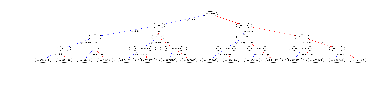

In [84]:
import matplotlib.pyplot as plt

import os; os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'

dtrn = xgb.DMatrix(X_var,Y_var)

xg_reg = xgb.train(params = prm, dtrain = dtrn, num_boost_round=12)

xgb.plot_tree(xg_reg)
plt.rcParams['figure.figsize'] = [10, 10]
plt.show()

## Ploteamos el Feature Importance

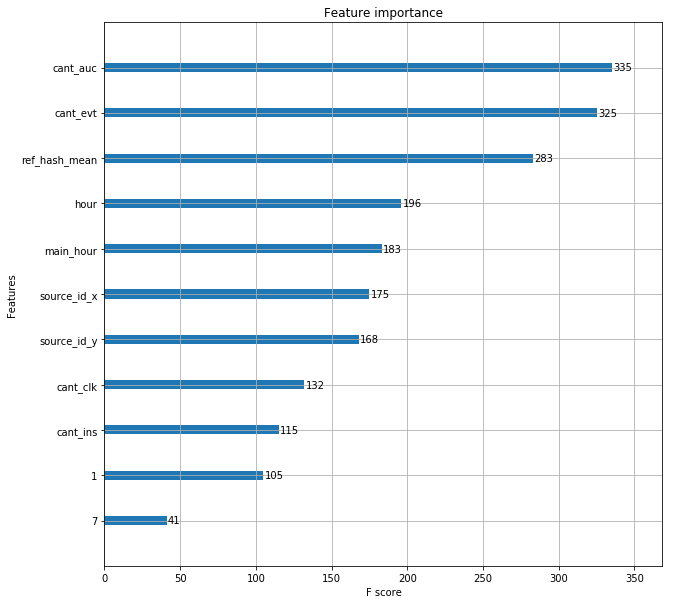

In [87]:
import matplotlib.pyplot as plt
xgb.plot_importance(fit, importance_type = "weight" )
plt.rcParams['figure.figsize'] = [7, 7]
plt.show()